<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_136916387_1_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [1]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.01)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 136916387
period = 15.4840857386238  # Orbital period in days
epoch = 1637.33092152807
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.8]
folded_lc = folded_lc[folded_lc.time > -0.8]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_136916387_all_sector_lightcurve.csv


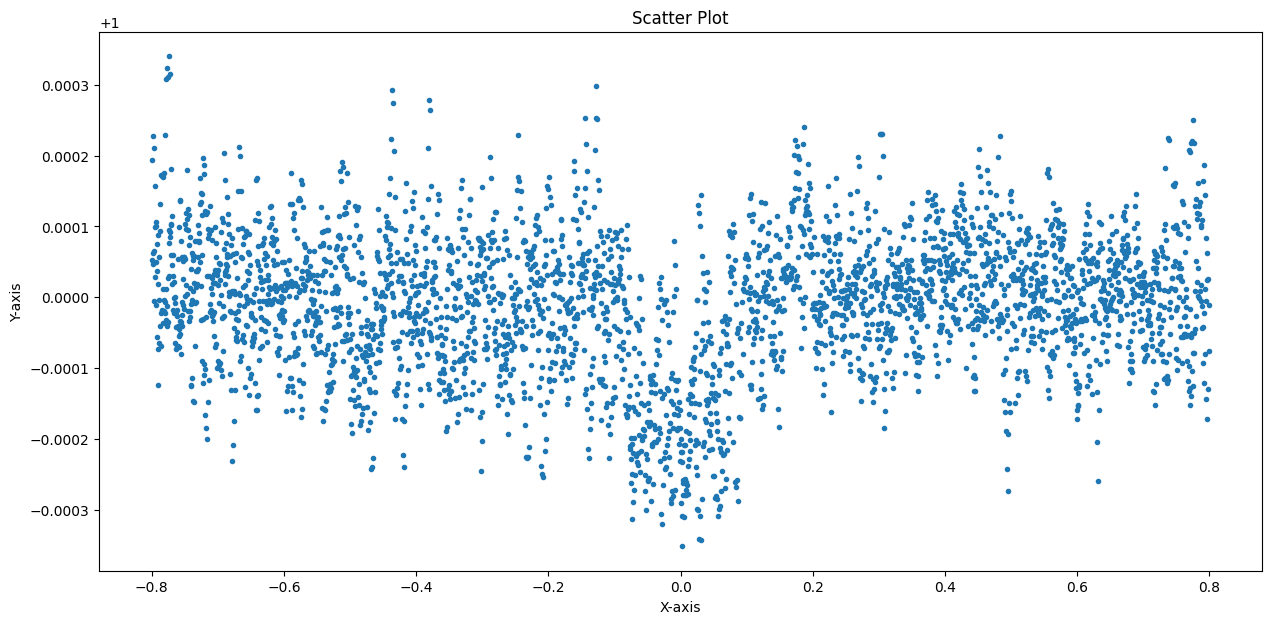

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [4]:
ID = tic_id
sectors = np.array([12, 38])
target = tr.target(ID=ID, sectors=sectors, search_radius=6) # target radius shorted

<ipython-input-5-dd38482abd6d>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_12, ap_38])


Sector 12


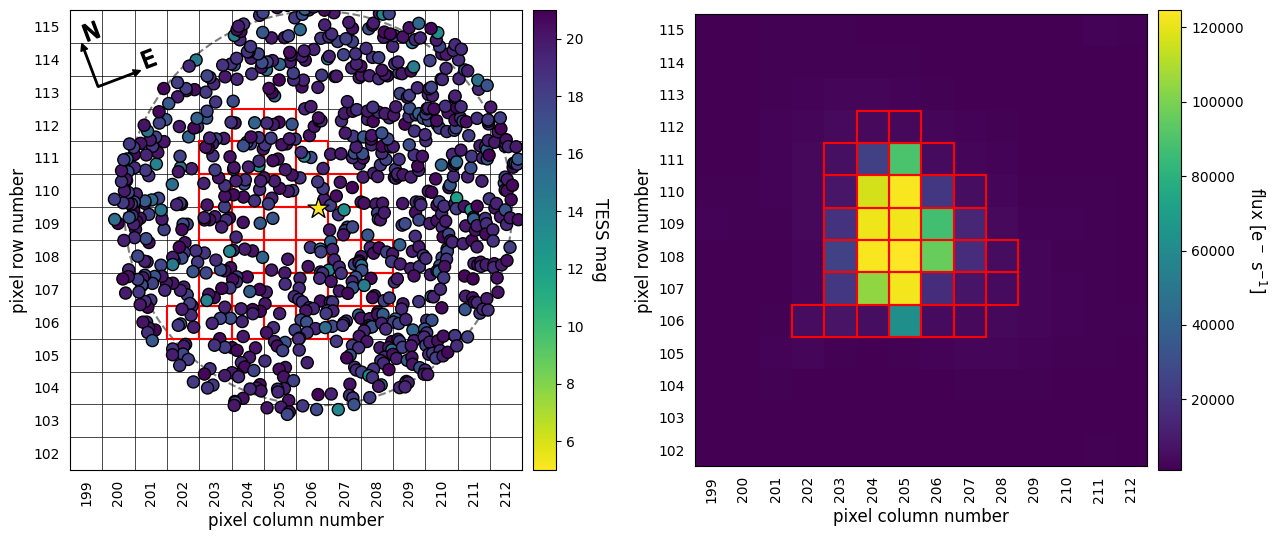

Sector 38


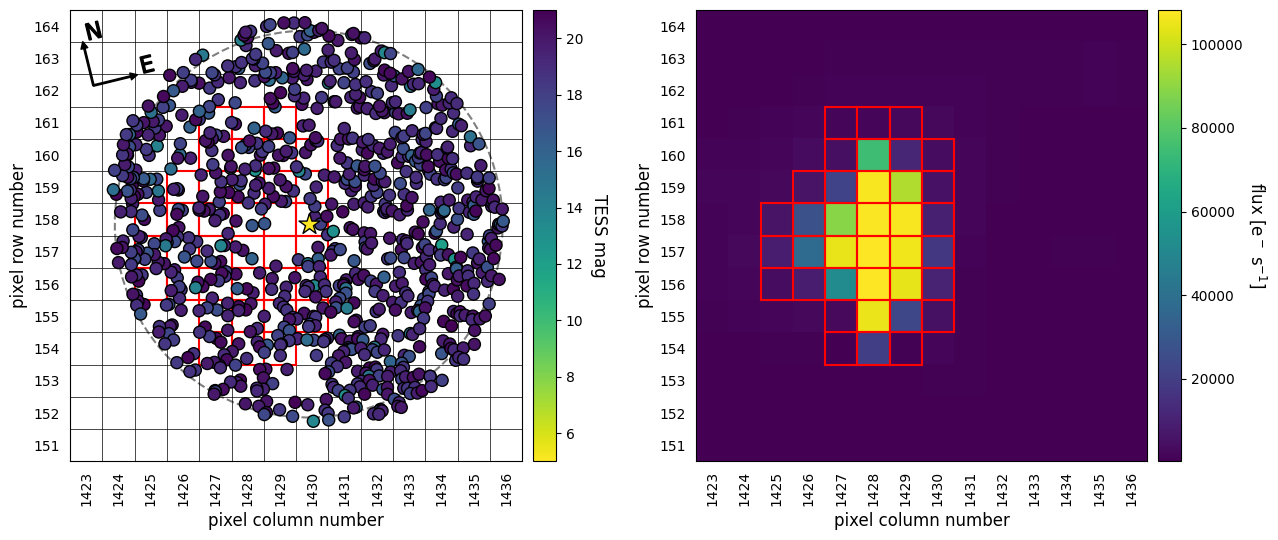

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,136916387,5.0494,4.308,3.898,4.159,230.450630,-48.317628,1.03,1.026070,5739.0,68.081800,0.000,0.000
1,1152960162,19.4797,NaN,NaN,NaN,230.452609,-48.316685,NaN,NaN,NaN,-0.813724,5.829,54.365
2,1152960163,18.0251,NaN,NaN,NaN,230.453607,-48.318031,NaN,NaN,NaN,0.046447,7.273,101.499
3,1152960144,18.1479,NaN,NaN,NaN,230.453306,-48.314969,NaN,NaN,NaN,NaN,11.521,33.785
4,1152960161,20.4264,NaN,NaN,NaN,230.455680,-48.316987,NaN,NaN,NaN,NaN,12.308,79.181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,1152902942,19.8994,NaN,NaN,NaN,230.462135,-48.350411,NaN,NaN,NaN,0.448823,121.185,166.872
861,1152909823,18.7161,NaN,NaN,NaN,230.480901,-48.344645,NaN,NaN,NaN,0.777825,121.279,143.328
862,1152960346,20.2499,NaN,NaN,NaN,230.462581,-48.284874,NaN,NaN,NaN,-1.189050,121.339,13.648
863,1152960345,20.4077,NaN,NaN,NaN,230.457278,-48.284212,NaN,NaN,NaN,NaN,121.347,7.542


In [5]:
ap_12 = np.array([[202.0, 106.0], [203.0, 106.0], [203.0, 107.0], [203.0, 108.0], [
        203.0, 109.0], [203.0, 110.0], [203.0, 111.0], [204.0, 106.0], [204.0, 107.0],
      [204.0, 108.0], [204.0, 109.0], [204.0, 110.0], [204.0, 111.0], [204.0, 112.0],
      [205.0, 106.0], [205.0, 107.0], [205.0, 108.0], [205.0, 109.0], [205.0, 110.0],
      [205.0, 111.0], [205.0, 112.0], [206.0, 106.0], [206.0, 107.0], [206.0, 108.0],
      [206.0, 109.0], [206.0, 110.0], [206.0, 111.0], [207.0, 106.0], [207.0, 107.0],
      [207.0, 108.0], [207.0, 109.0], [207.0, 110.0], [208.0, 107.0], [208.0, 108.0]])
ap_38 = np.array([[1425.0, 156.0], [1425.0, 157.0], [1425.0, 158.0], [1426.0, 156.0], [1426.0,
        157.0], [1426.0, 158.0], [1426.0, 159.0], [1427.0, 154.0], [1427.0, 155.0],
      [1427.0, 156.0], [1427.0, 157.0], [1427.0, 158.0], [1427.0, 159.0], [1427.0,
        160.0], [1427.0, 161.0], [1428.0, 154.0], [1428.0, 155.0], [1428.0, 156.0],
      [1428.0, 157.0], [1428.0, 158.0], [1428.0, 159.0], [1428.0, 160.0], [1428.0,
        161.0], [1429.0, 154.0], [1429.0, 155.0], [1429.0, 156.0], [1429.0, 157.0],
      [1429.0, 158.0], [1429.0, 159.0], [1429.0, 160.0], [1429.0, 161.0], [1430.0,
        155.0], [1430.0, 156.0], [1430.0, 157.0], [1430.0, 158.0], [1430.0, 159.0],
      [1430.0, 160.0]])

apertures = np.array([ap_12, ap_38])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [6]:
tdepth = 0.154 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,136916387,5.0494,4.308,3.898,4.159,230.450630,-48.317628,1.03,1.026070,5739.0,68.081800,0.000,0.000,9.956264e-01,0.000155
1,1152960162,19.4797,NaN,NaN,NaN,230.452609,-48.316685,NaN,NaN,NaN,-0.813724,5.829,54.365,1.546730e-06,0.000000
2,1152960163,18.0251,NaN,NaN,NaN,230.453607,-48.318031,NaN,NaN,NaN,0.046447,7.273,101.499,5.480689e-06,0.000000
3,1152960144,18.1479,NaN,NaN,NaN,230.453306,-48.314969,NaN,NaN,NaN,NaN,11.521,33.785,5.111695e-06,0.000000
4,1152960161,20.4264,NaN,NaN,NaN,230.455680,-48.316987,NaN,NaN,NaN,NaN,12.308,79.181,5.174140e-07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,1152902942,19.8994,NaN,NaN,NaN,230.462135,-48.350411,NaN,NaN,NaN,0.448823,121.185,166.872,2.521256e-10,0.000000
861,1152909823,18.7161,NaN,NaN,NaN,230.480901,-48.344645,NaN,NaN,NaN,0.777825,121.279,143.328,3.553554e-11,0.000000
862,1152960346,20.2499,NaN,NaN,NaN,230.462581,-48.284874,NaN,NaN,NaN,-1.189050,121.339,13.648,4.968508e-11,0.000000
863,1152960345,20.4077,NaN,NaN,NaN,230.457278,-48.284212,NaN,NaN,NaN,NaN,121.347,7.542,8.875446e-11,0.000000


In [7]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/120
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 136916387.
Calculating EB and EBx2P scenario probabilities for 136916387.
Calculating PTP scenario probability for 136916387.
Calculating PEB and PEBx2P scenario probabilities for 136916387.
Calculating STP scenario probability for 136916387.
Calculating SEB and SEBx2P scenario probabilities for 136916387.
Calculating DTP scenario probability for 136916387.
Calculating DEB and DEBx2P scenario probabilities for 136916387.
Calculating BTP scenario probability for 136916387.
Calculating BEB and BEBx2P scenario probabilities for 136916387.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 1152960129.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 136916392.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 1152960167.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 136916393.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 136916385.
Calculating NTP, NEB, and NEB2xP scenario probabilities for

In [8]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.00634694
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,136916387,TP,1.030000,1.026070,15.484086,89.042900,0.566169,0.325013,261.026135,1.333263,0.000000,0.000000,6.731699e-01
1,136916387,EB,1.030000,1.026070,15.484086,85.657056,1.673670,0.319584,62.952983,0.000000,0.881701,0.914095,2.674201e-161
2,136916387,EBx2P,1.030000,1.026070,30.968171,88.117954,1.875278,0.286958,218.685769,0.000000,0.982379,1.026070,3.959481e-126
3,136916387,PTP,1.030000,1.026070,15.484086,89.031851,0.596004,0.384243,259.844084,1.345978,0.000000,0.000000,1.194060e-01
4,136916387,PEB,1.030000,1.026070,15.484086,86.075170,1.833476,0.185456,46.687797,0.000000,0.856769,0.884856,6.831753e-154
5,136916387,PEBx2P,1.030000,1.026070,30.968171,88.767922,0.294091,0.871648,186.400075,0.000000,1.022719,1.026070,1.027953e-46
6,136916387,STP,0.991515,1.026070,15.484086,88.974342,0.468454,0.030366,261.984176,1.987511,0.000000,0.000000,6.346935e-03
7,136916387,SEB,0.115510,0.141188,15.484086,89.513899,0.156058,0.922889,195.468844,0.000000,0.013320,0.100000,1.185549e-20
8,136916387,SEBx2P,0.166557,0.198522,30.968171,89.571220,0.884791,0.596826,200.978263,0.000000,0.163083,0.195067,2.498655e-59
9,136916387,DTP,1.030000,1.026070,15.484086,88.882398,0.611238,0.241682,249.837157,1.346270,0.000000,0.000000,2.010772e-01


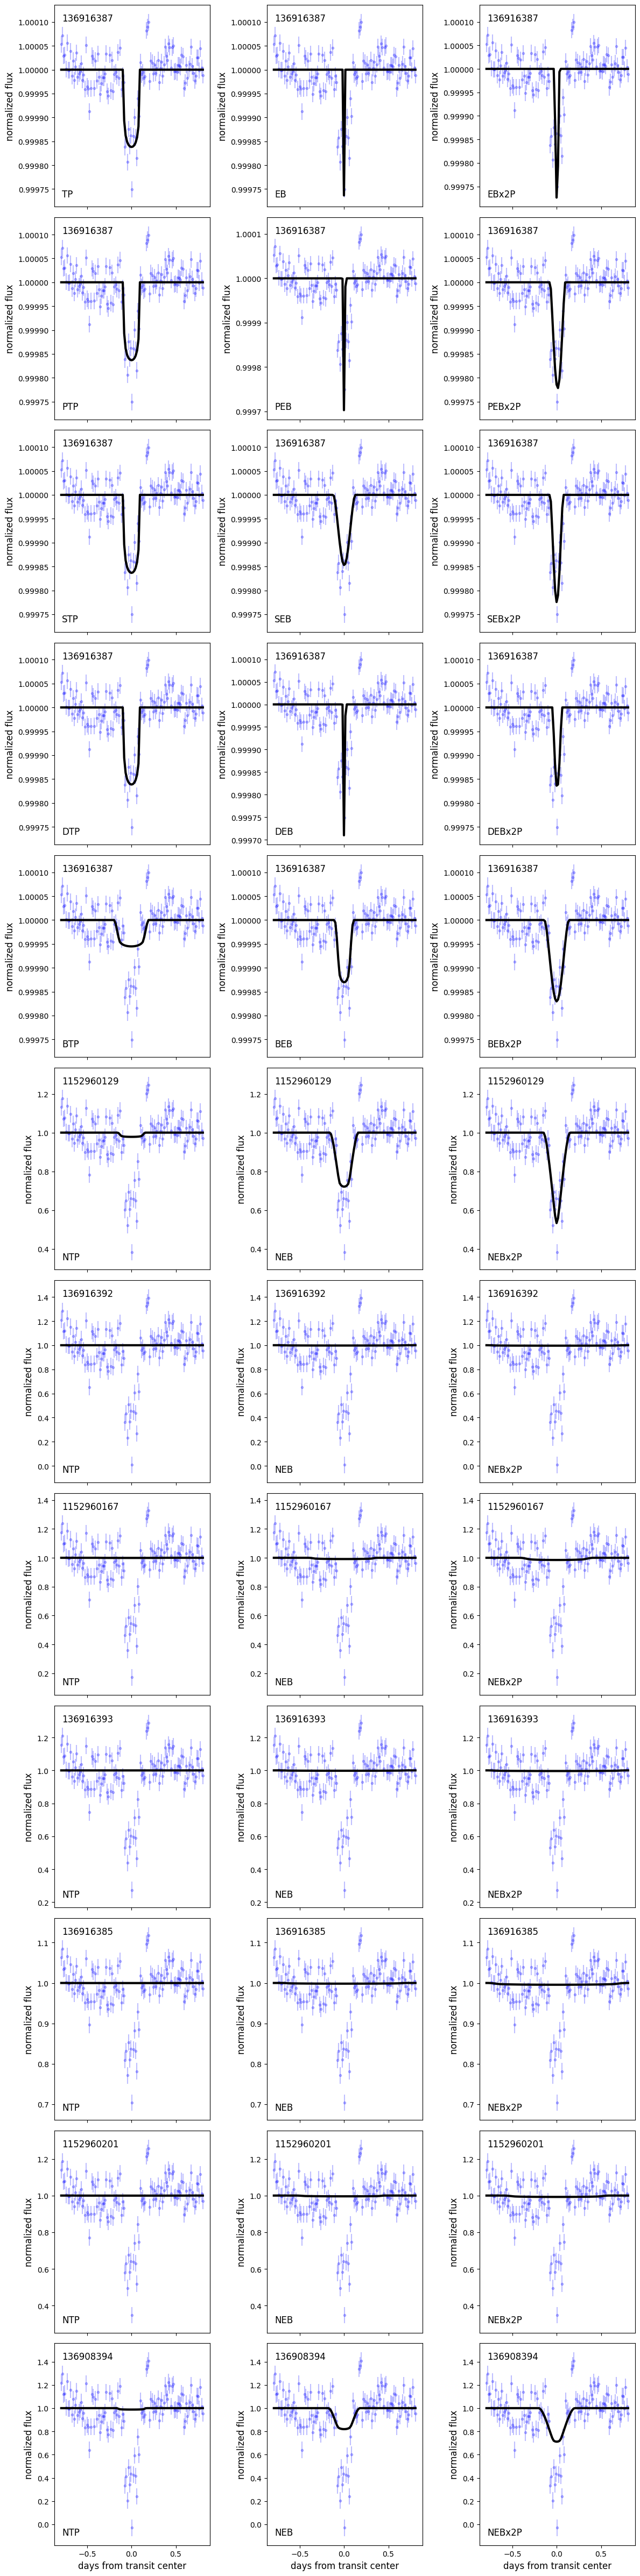

In [9]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [10]:
# Reduced repetition and split
FPPs = np.zeros(10)
NFPPs = np.zeros(10)

In [11]:
# for i in range(5):
#     target.calc_probs(time=lc.time.value,
#                       flux_0=lc.flux.value,
#                       flux_err_0=np.mean(lc.flux_err.value),
#                       P_orb=P_orb,
#                       parallel=True,
#                       verbose=0)
#     FPPs[i] = target.FPP
#     NFPPs[i] = target.NFPP
# Already done and accounted for

In [12]:
# print(FPPs)
# print(NFPPs)
# Note:
# [0.01405787 0.02274088 0.04270071 0.01507956 0.0221375  0.
#  0.         0.         0.         0.        ]
# [1.13216252e-12 1.19864854e-12 1.40958901e-12 1.06269956e-12
#  1.57811877e-12 0.00000000e+00 0.00000000e+00 0.00000000e+00
#  0.00000000e+00 0.00000000e+00]

In [13]:
# for i in range(5):
#     target.calc_probs(time=lc.time.value,
#                       flux_0=lc.flux.value,
#                       flux_err_0=np.mean(lc.flux_err.value),
#                       P_orb=P_orb,
#                       parallel=True,
#                       verbose=0)
#     FPPs[i + 5] = target.FPP
#     NFPPs[i + 5] = target.NFPP
# Already done and accounted for

In [ ]:
# print(FPPs)
# print(NFPPs)
# Note:
# [0.         0.         0.         0.         0.         0.02099385
#  0.03380679 0.01734482 0.05025095 0.03047624]
# [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
#  0.00000000e+00 1.82079748e-12 1.68522528e-12 1.17455295e-12
#  1.27471293e-12 1.33868647e-12]

In [16]:
# Finally
FPPs = [0.01405787, 0.02274088, 0.04270071, 0.01507956, 0.0221375, 0.02099385,
        0.03380679, 0.01734482, 0.05025095, 0.03047624]
NFPPs = [1.13216252e-12, 1.19864854e-12, 1.40958901e-12, 1.06269956e-12,
         1.57811877e-12, 1.82079748e-12, 1.68522528e-12, 1.17455295e-12,
         1.27471293e-12, 1.33868647e-12]

In [17]:
meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.026958917 +/- 0.011516052681927128
NFPP = 1.3675193509999998e-12 +/- 2.400053714930009e-13


Our final conclusion about this specified planet of TIC 136916387 is that it is most likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).